<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Climate data 2D plotting on Python
Notes by **Col Rakesh Pedram** on class conducted by Dr Sabin IITM, Pune (Shimla Office)-27 Oct 24
Running in colab environment.
Core coding peculiarity in handling netCDF files. Rest code is basic plotting skill.
Mark the dimension of data, which is frequent error. My Onenote link [Rak PG Onenote](https://1drv.ms/o/s!Aj6Iek_hS5rjrqM09wuOoOA9ZKzYRw?e=Bfsw9q)
Podcast on module conducted - [Audio summary of module](https://notebooklm.google.com/notebook/ddadebb6-5e31-475c-9007-eee35c478675/audio)

### Key Learning


*   Sourcing geodata from Major soirces, refer Sabin's slide notes
*   Working with NetCDF data format for 2D plots
*   Filtering data and getting mean, max over timeine
*   These datasets are huge, cloud computing is stretched
*   Array based data manipulation is easiest
*   Can integrate with geopandas to superimpose your own GIS data and shape files- Future experimentation
*   Most geo tools like ferret work in linux environment- Created it with WSL on my Win 11. Which is better?
*   Basic Python orientation is adequate
*   Does not work for dynamic data like wind circulation- Use google cast for it. Seperate python notebook













## Demo
1) Make an annual mean Climatological spatial temperature map:
2) Make a summer time (March, April, May) mean Climatological spatial
temperature map:
3) Mar to May averaged time series for the global mean. The initial 20
year climatology is removed and that time series is plotted.
4) Regional temperature time-series: Mar to May averaged for a region
say over central India 10N to 20N and 80E-95E. The initial 20 year
climatology is removed and that time series is plotted

1) Plot Detection and Attribution : here global mean
temperature from GHG only simulation, Aerosol only
simulation Natural only simulation and All forcing (Historic)
simulation is plotted
2) Plot future changes in temperature (data given is historical
and for future ssp245 and ssp585 scenarios)

3) Temperature Change over Middle East (data given is over
middle east)

Python script will be given
This I will demonstrate
Later participants can try to do

Python script will be given
This we can do in a browser

EBM
1) Calculate mean temperature of earth with out green house
effect
2) Calculate mean temperature of earth with green house effect
3) Latitudinal distribution of temperature
4) Mimicking CO2 effect in EBM

GCM/ESM
1) Will show a complete earth system model

2) How we are running a GCM

3) Data processing and analysis

## Mar to May averaged time series for the global mean.
The initial 20 year climatology is removed and that time series is plotted

*   My data is in google drive. Uploading data on colabs is time consuming
*   Modify as required. Xarray has to be upgraded for netCDF files




In [ ]:
# Run this code block only once as this is sys upgrade ! of python packages
# !pip install --upgrade xarray dask netCDF4 bottleneck

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 908MB
Dimensions:  (lon: 720, lat: 360, time: 876)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 7kB 1951-01-16 1951-02-15 ... 2023-12-16
Data variables:
    tmn      (time, lat, lon) float32 908MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Oct 27 12:45:24 2024: cdo -selvar,tmn cru_ts4.08.1951-2...
    source:       Run ID = 2406270856. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.08 Minimum Temperature
    references:   Information on the data is available at http://badc.nerc.ac...

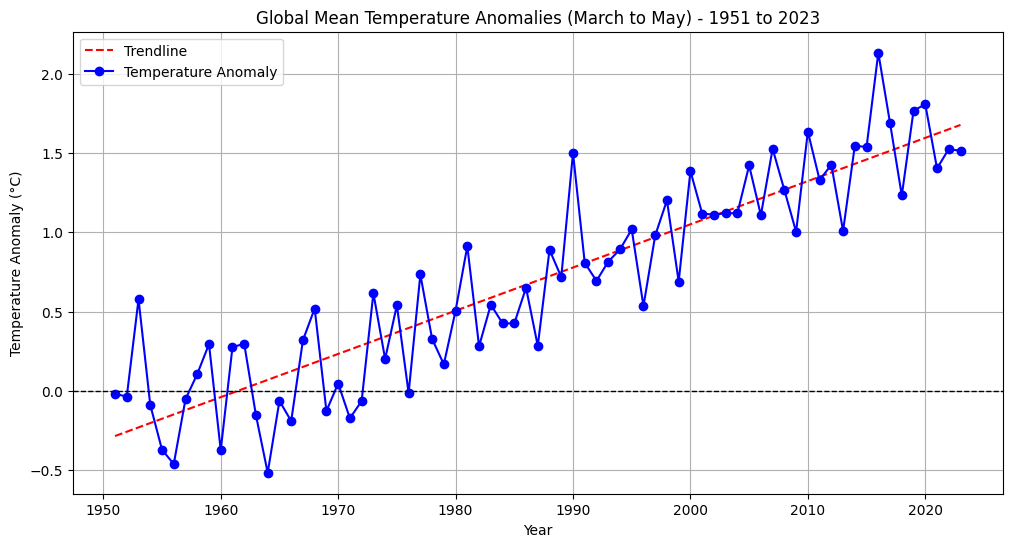

In [22]:

# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Provide the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Dataset/cru_ts4.08.1951-2023.tmn.dat.nc'  # Replace with your actual path

# Step 2: Load the dataset
ds = xr.open_dataset(file_path)

# Step 3: Display the dataset information (optional)
print(ds)
# Step 4: Select the 'tmn' variable
tmn_data = ds['tmn']
# Step 5: Extract data for March, April, and May
# This step assumes the time coordinate is in a format compatible with xarray's datetime
seasonal_data = tmn_data.sel(time=tmn_data['time.month'].isin([3, 4, 5]))
# Step 6: Calculate the mean temperature for March to May for each year
annual_mean_temp = seasonal_data.groupby('time.year').mean(dim='time')

# Step 7: Calculate the 20-year climatology
# Assume the climatology is the average from the first 20 years (1951-1970)
climatology = annual_mean_temp.sel(year=slice(1951, 1970)).mean(dim='year')

# Step 8: Remove the climatology from the time series
anomalies = annual_mean_temp - climatology

# Step 9: Plot the time series
plt.figure(figsize=(12, 6))

# Calculate the global mean anomaly for each year
global_mean_anomaly = anomalies.mean(dim=('lat', 'lon'))  # Change made here

# --- Calculate and plot the trendline ---
z = np.polyfit(global_mean_anomaly['year'], global_mean_anomaly, 1)  # Fit a 1st-degree polynomial (line)
p = np.poly1d(z)
plt.plot(global_mean_anomaly['year'], p(global_mean_anomaly['year']), linestyle='--', color='r', label='Trendline')
# --- End of trendline calculation ---

# Plot the global mean anomaly
plt.plot(global_mean_anomaly['year'], global_mean_anomaly, marker='o', linestyle='-', color='b', label='Temperature Anomaly')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Global Mean Temperature Anomalies (March to May) - 1951 to 2023')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid()
plt.legend()
plt.show()
# Close the dataset
ds.close()

## Check code
Checks file path in above code is correct and no spelling errors

In [ ]:
import os

# Check if the file exists
file_exists = os.path.exists('/content/drive/My Drive/Dataset/cru_ts4.08.1951-2023.tmn.dat.nc')

if file_exists:
    print("File exists")
else:
    print("File not found")

File exists


## Regional temperature time-series:
Mar to May averaged time series for a region say over central India 10N to 20N and 80E-95E. The initial 20 year climatology is removed and that time series is plotted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 908MB
Dimensions:  (lon: 720, lat: 360, time: 876)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 7kB 1951-01-16 1951-02-15 ... 2023-12-16
Data variables:
    tmn      (time, lat, lon) float32 908MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Oct 27 12:45:24 2024: cdo -selvar,tmn cru_ts4.08.1951-2...
    source:       Run ID = 2406270856. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.08 Minimum Temperature
    references:   Information on the data is available at http://badc.nerc.ac...

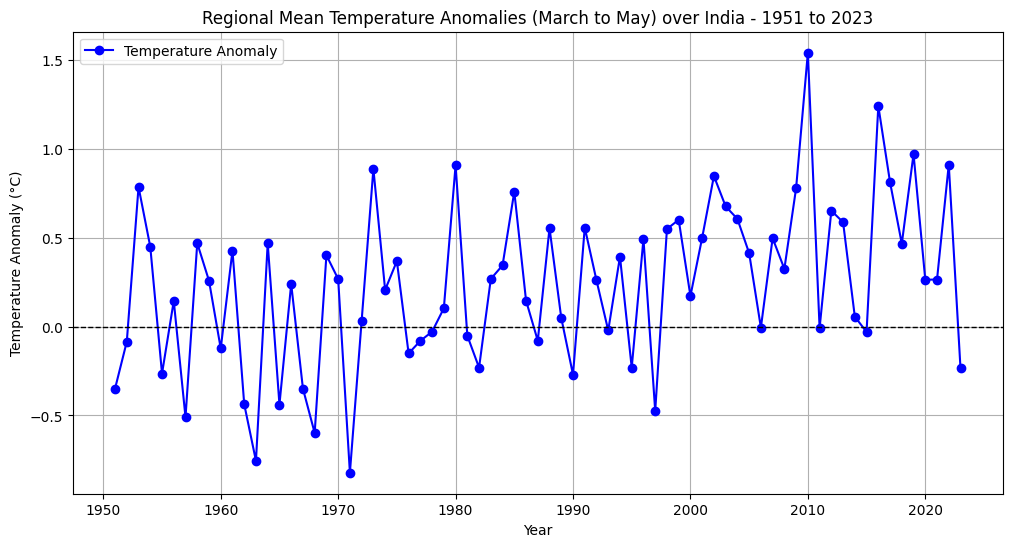

In [ ]:

# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Provide the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Dataset/cru_ts4.08.1951-2023.tmn.dat.nc'  # Replace with your actual path

ds = xr.open_dataset(file_path)
# Step 3: Display the dataset information (optional)
print(ds)
# Step 4: Select the 'tmn' variable
tmn_data = ds['tmn']
# Step 5: Extract data for March, April, and May
seasonal_data = tmn_data.sel(time=tmn_data['time.month'].isin([3, 4, 5]))
# Step 6: Select the region for India (10N to 20N and 80E to 95E)
indian_region = seasonal_data.sel(lat=slice(10, 20), lon=slice(80, 95))
# Step 7: Calculate the mean temperature for March to May for each year over India
annual_mean_temp = indian_region.groupby('time.year').mean(dim='time')
# Step 8: Calculate the 20-year climatology
climatology = annual_mean_temp.sel(year=slice(1951, 1970)).mean(dim='year')
# Step 9: Remove the climatology from the time series
anomalies = annual_mean_temp - climatology


# Step 10: Plot the time series
plt.figure(figsize=(12, 6))

# Calculate the regional mean anomaly for each year (Change made here)
regional_mean_anomaly = anomalies.mean(dim=('lat', 'lon'))

# Plot the regional mean anomaly
plt.plot(regional_mean_anomaly['year'], regional_mean_anomaly, marker='o', linestyle='-', color='b', label='Temperature Anomaly')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Regional Mean Temperature Anomalies (March to May) over India - 1951 to 2023')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid()
plt.legend()
plt.show()

# Close the dataset
ds.close()

## Script to make an annual mean Climatological spatial temperature map:


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 93.7 MB/s eta 0:00:00


Please upload the dataset file (cru_ts4.08.1951-2023.tmn.dat.nc): to google drive path My Drive/Dataset
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 908MB
Dimensions:  (lon: 720, lat: 360, time: 876)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 7kB 1951-01-16 1951-02-15 ... 2023-12-16
Data variables:
    tmn      (time, lat, lon) float32 908MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Oct 27 12:45:24 2024: cdo -selvar,tmn cru_ts4.08.1951-2...
    source:       Run ID = 2406270856. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


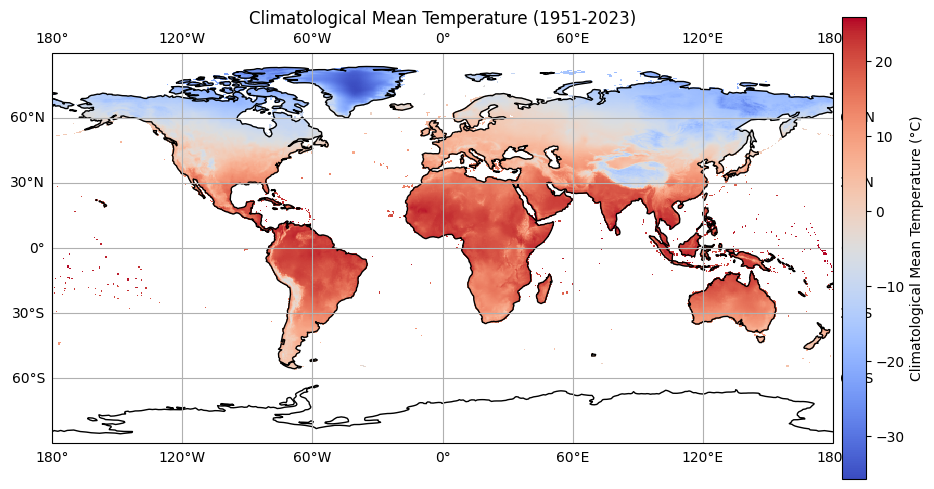

In [ ]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from google.colab import files

# Step 1: Upload the dataset file to google drive 'My Drive/Dataset'
print("Please upload the dataset file (cru_ts4.08.1951-2023.tmn.dat.nc): to google drive path My Drive/Dataset")


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Provide the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Dataset/cru_ts4.08.1951-2023.tmn.dat.nc'  # Replace with your actual path
ds = xr.open_dataset(file_path)

# Step 3: Display the dataset information (optional)
print(ds)

# Step 4: Select the 'tmn' variable and calculate the climatological mean
tmn_data = ds['tmn']

# Calculate the climatological mean over the time dimension
climatological_mean = tmn_data.mean(dim='time')

# Step 5: Set up the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Step 6: Plot the climatological mean temperature
clim_map = ax.pcolormesh(climatological_mean['lon'], climatological_mean['lat'],
                          climatological_mean, cmap='coolwarm', shading='auto')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add a colorbar
cbar = plt.colorbar(clim_map, orientation='vertical', pad=0.01)
cbar.set_label('Climatological Mean Temperature (°C)')

# Title
plt.title('Climatological Mean Temperature (1951-2023)')
plt.show()

# Close the dataset
ds.close()


## Filter data with widgets for latlong
Code modification to filter data by latlong by using python slider widgets
India Lat long box: Lat 8-38N, Long 68-98E
Reuse this code snip to other variations

In [21]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from google.colab import files
import ipywidgets as widgets
from IPython.display import display


# Step 1: Upload the dataset file to google drive 'My Drive/Dataset'
print("Please upload the dataset file (cru_ts4.08.1951-2023.tmn.dat.nc): to google drive path My Drive/Dataset")


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Provide the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Dataset/cru_ts4.08.1951-2023.tmn.dat.nc'  # Replace with your actual path
ds = xr.open_dataset(file_path)

# Step 3: Display the dataset information (optional)
print(ds)

# Step 4: Select the 'tmn' variable and calculate the climatological mean
tmn_data = ds['tmn']

# Calculate the climatological mean over the time dimension
climatological_mean = tmn_data.mean(dim='time')

# --- Widget setup ---

# Latitude and longitude sliders with default values for India
lat_slider = widgets.FloatRangeSlider(
    value=[8, 38],  # Default latitude range for India
    min=climatological_mean['lat'].min().item(),
    max=climatological_mean['lat'].max().item(),
    step=0.5,
    description='Latitude:',
    continuous_update=False
)

lon_slider = widgets.FloatRangeSlider(
    value=[68, 98],  # Default longitude range for India
    min=climatological_mean['lon'].min().item(),
    max=climatological_mean['lon'].max().item(),
    step=0.5,
    description='Longitude:',
    continuous_update=False
)

# --- Plotting function ---

def plot_climatology(lat_range, lon_range):
    plt.figure(figsize=(12, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Select data based on latitude and longitude ranges
    selected_data = climatological_mean.sel(
        lat=slice(lat_range[0], lat_range[1]),
        lon=slice(lon_range[0], lon_range[1])
    )

    # Plot the selected data
    clim_map = ax.pcolormesh(selected_data['lon'], selected_data['lat'],
                            selected_data, cmap='coolwarm', shading='auto')


    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Add a colorbar
    cbar = plt.colorbar(clim_map, orientation='vertical', pad=0.01)
    cbar.set_label('Climatological Mean Temperature (°C)')

    # Title
    plt.title('Climatological Mean Temperature (1951-2023)')
    plt.show()

# --- Interactive widget ---

interactive_plot = widgets.interactive(
    plot_climatology,
    lat_range=lat_slider,
    lon_range=lon_slider
)

display(interactive_plot)  # Display the interactive plot

# Close the dataset
ds.close()


Please upload the dataset file (cru_ts4.08.1951-2023.tmn.dat.nc): to google drive path My Drive/Dataset
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 908MB
Dimensions:  (lon: 720, lat: 360, time: 876)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 7kB 1951-01-16 1951-02-15 ... 2023-12-16
Data variables:
    tmn      (time, lat, lon) float32 908MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Oct 27 12:45:24 2024: cdo -selvar,tmn cru_ts4.08.1951-2...
    source:       Run ID = 2406270856. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4

interactive(children=(FloatRangeSlider(value=(8.0, 38.0), continuous_update=False, description='Latitude:', ma…

## Temperature Change over Middle East (data given is over middle east)

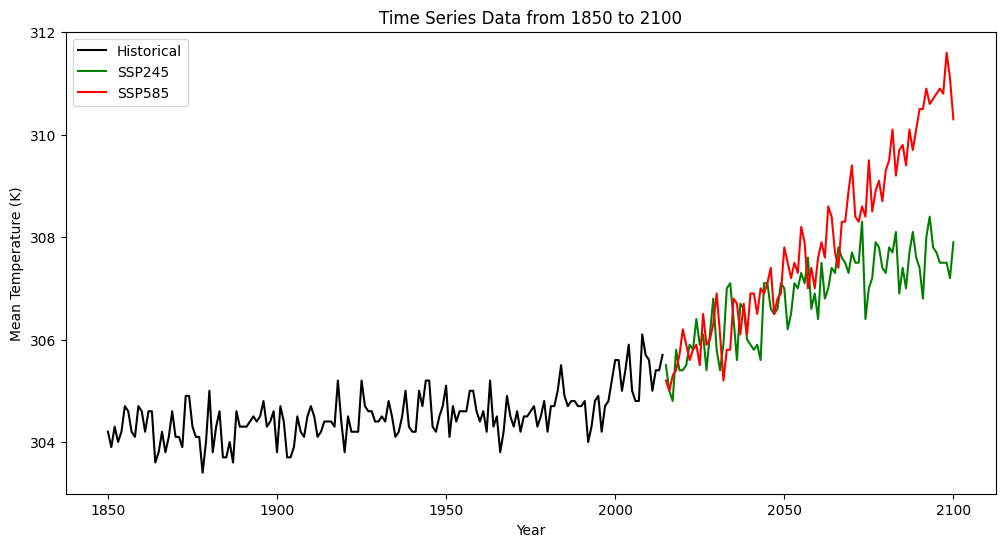

In [ ]:
# Temperature Change over Middle East (data given is over middle east)

import numpy as np
import matplotlib.pyplot as plt

# Full data for years, historical, ssp245, and ssp585
years = np.array([
    1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
    1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
    1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
    1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
    1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
    1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
    1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
    1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
    2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
    2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
    2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089,
    2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100
])

historical = np.array([
    304.2, 303.9, 304.3, 304.0, 304.2, 304.7, 304.6, 304.2, 304.1, 304.7,
    304.6, 304.2, 304.6, 304.6, 303.6, 303.8, 304.2, 303.8, 304.1, 304.6,
    304.1, 304.1, 303.9, 304.9, 304.9, 304.3, 304.1, 304.1, 303.4, 304.0,
    305.0, 303.8, 304.3, 304.6, 303.7, 303.7, 304.0, 303.6, 304.6, 304.3,
    304.3, 304.3, 304.4, 304.5, 304.4, 304.5, 304.8, 304.3, 304.4, 304.6,
    303.8, 304.7, 304.4, 303.7, 303.7, 303.9, 304.5, 304.2, 304.1, 304.5,
    304.7, 304.5, 304.1, 304.2, 304.4, 304.4, 304.4, 304.3, 305.2, 304.4,
    303.8, 304.5, 304.2, 304.2, 304.2, 305.2, 304.7, 304.6, 304.6, 304.4,
    304.4, 304.5, 304.4, 304.8, 304.5, 304.1, 304.2, 304.5, 305.0, 304.3,
    304.2, 304.2, 305.0, 304.7, 305.2, 305.2, 304.3, 304.2, 304.5, 304.7,
    305.1, 304.1, 304.7, 304.4, 304.6, 304.6, 304.6, 305.0, 305.0, 304.6,
    304.4, 304.6, 304.2, 305.2, 304.3, 304.5, 303.8, 304.2, 304.9, 304.5,
    304.3, 304.6, 304.2, 304.5, 304.5, 304.6, 304.7, 304.3, 304.5, 304.8,
    304.2, 304.7, 304.7, 305.0, 305.5, 304.9, 304.7, 304.8, 304.8, 304.7,
    304.7, 304.8, 304.0, 304.3, 304.8, 304.9, 304.2, 304.7, 304.8, 305.2,
    305.6, 305.6, 305.0, 305.4, 305.9, 305.0, 304.8, 304.8, 306.1, 305.7,
    305.6, 305.0, 305.4, 305.4, 305.7
])

ssp245 = np.array([
    305.5, 305.0, 304.8, 305.8, 305.4, 305.4, 305.5, 305.9, 305.8, 306.4,
    305.9, 306.1, 305.4, 306.1, 306.8, 305.8, 305.4, 305.9, 307.0, 307.1,
    306.4, 305.6, 306.7, 306.6, 306.0, 305.9, 305.8, 305.9, 305.6, 307.1,
    307.1, 306.6, 306.5, 306.6, 307.1, 307.0, 306.2, 306.5, 307.1, 307.0,
    307.3, 307.1, 307.6, 306.6, 306.9, 306.4, 307.5, 306.8, 307.0, 307.4,
    307.3, 307.8, 307.6, 307.5, 307.3, 307.7, 307.5, 307.5, 308.3, 306.4,
    307.0, 307.2, 307.9, 307.8, 307.4, 307.3, 307.8, 307.7, 308.1, 306.9,
    307.4, 307.0, 307.7, 308.1, 307.6, 307.4, 306.8, 308.0, 308.4, 307.8,
    307.7, 307.5, 307.5, 307.5, 307.2, 307.9
])

ssp585 = np.array([
    305.2, 305.0, 305.3, 305.4, 305.7, 306.2, 305.9, 305.6, 305.8, 305.9,
    305.5, 306.5, 305.9, 306.0, 306.3, 306.9, 306.1, 305.2, 305.8, 305.8,
    306.8, 306.7, 306.1, 306.7, 306.1, 306.9, 306.9, 306.5, 307.0, 306.9,
    307.1, 307.4, 306.5, 306.8, 306.9, 307.8, 307.5, 307.2, 307.5, 307.3,
    308.2, 307.9, 307.0, 307.4, 307.0, 307.6, 307.9, 307.6, 308.6, 308.4,
    307.7, 307.4, 308.3, 308.3, 308.9, 309.4, 308.4, 308.3, 308.6, 308.4,
    309.5, 308.5, 308.9, 309.1, 308.7, 309.3, 309.5, 310.1, 309.2, 309.7,
    309.8, 309.4, 310.1, 309.7, 310.1, 310.5, 310.5, 310.9, 310.6, 310.7,
    310.8, 310.9, 310.8, 311.6, 311.1, 310.3
])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(years[:len(historical)], historical, color='black', label='Historical')
plt.plot(years[len(historical):len(historical)+len(ssp245)], ssp245, color='green', linestyle='-', label='SSP245')
plt.plot(years[len(historical):len(historical)+len(ssp585)], ssp585, color='red', linestyle='-', label='SSP585')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (K)')
plt.title('Time Series Data from 1850 to 2100')
plt.legend()
plt.show()


## Plot future changes in temperature
(data given is historical and for future ssp245 and ssp585 scenarios)

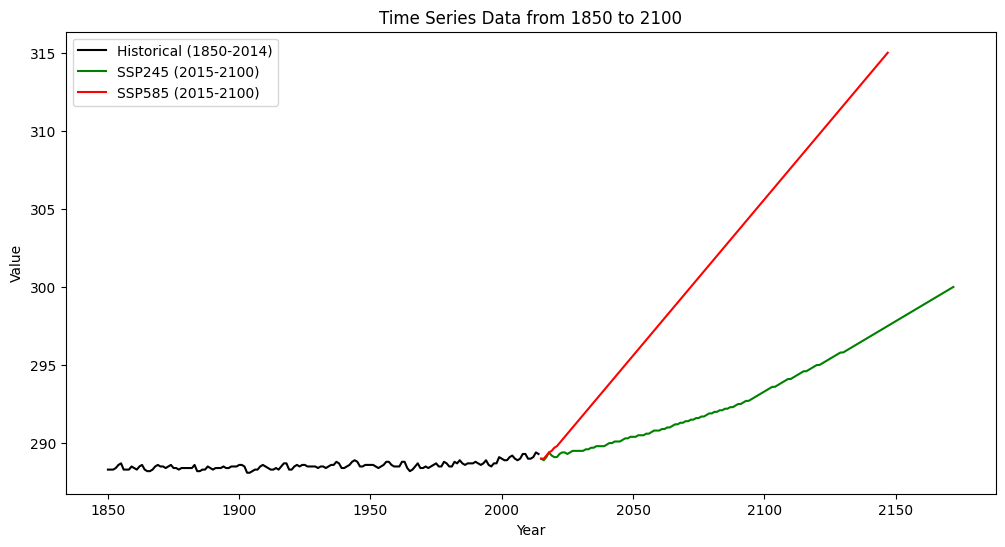

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Full data for years, historical, ssp245, and ssp585
years = np.array([
1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089,
2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100
])
historical = np.array([
288.3, 288.3, 288.3, 288.4, 288.6, 288.7, 288.3, 288.3, 288.3, 288.5, 288.4, 288.3, 288.5, 288.6, 288.3, 288.2, 288.2,
288.3, 288.5, 288.6, 288.5, 288.5, 288.4, 288.5, 288.6, 288.4, 288.4, 288.3, 288.4, 288.4, 288.4, 288.4, 288.4, 288.6,
288.2, 288.2, 288.3, 288.3, 288.5, 288.4, 288.3, 288.4, 288.4, 288.4, 288.5, 288.4, 288.4, 288.5, 288.5, 288.5, 288.6,
288.6, 288.5, 288.1, 288.1, 288.2, 288.3, 288.3, 288.5, 288.6, 288.5, 288.4, 288.3, 288.3, 288.4, 288.3, 288.5, 288.7,
288.7, 288.3, 288.3, 288.5, 288.6, 288.5, 288.6, 288.6, 288.5, 288.5, 288.5, 288.5, 288.4, 288.5, 288.5, 288.4, 288.5,
288.6, 288.6, 288.8, 288.7, 288.4, 288.4, 288.5, 288.6, 288.8, 288.9, 288.8, 288.5, 288.5, 288.6, 288.6, 288.6, 288.6,
288.5, 288.4, 288.5, 288.6, 288.8, 288.8, 288.6, 288.5, 288.5, 288.5, 288.8, 288.8, 288.4, 288.2, 288.3, 288.5, 288.7,
288.4, 288.4, 288.5, 288.4, 288.5, 288.6, 288.7, 288.5, 288.5, 288.8, 288.7, 288.5, 288.5, 288.8, 288.7, 288.9, 288.7,
288.6, 288.7, 288.7, 288.7, 288.8, 288.7, 288.6, 288.7, 288.9, 288.6, 288.5, 288.7, 288.7, 289.1, 289.0, 288.9, 288.9,
289.1, 289.2, 289.0, 288.9, 289.0, 289.3, 289.3, 289.0, 289.0, 289.1, 289.4, 289.3
])
ssp245 = np.array([
289.0, 288.9, 289.1, 289.4, 289.2, 289.1, 289.1, 289.3, 289.4, 289.4, 289.3, 289.4, 289.5, 289.5, 289.5, 289.5, 289.5,
289.6, 289.6, 289.7, 289.7, 289.8, 289.8, 289.8, 289.8, 289.9, 290.0, 290.0, 290.1, 290.1, 290.1, 290.2, 290.3, 290.3,
290.4, 290.4, 290.4, 290.5, 290.5, 290.5, 290.6, 290.6, 290.7, 290.8, 290.8, 290.8, 290.9, 290.9, 291.0, 291.0, 291.1,
291.2, 291.2, 291.3, 291.3, 291.4, 291.4, 291.5, 291.5, 291.6, 291.6, 291.7, 291.7, 291.8, 291.9, 291.9, 292.0, 292.0,
292.1, 292.1, 292.2, 292.2, 292.3, 292.3, 292.4, 292.5, 292.5, 292.6, 292.7, 292.7, 292.8, 292.9, 293.0, 293.1, 293.2,
293.3, 293.4, 293.5, 293.6, 293.6, 293.7, 293.8, 293.9, 294.0, 294.1, 294.1, 294.2, 294.3, 294.4, 294.5, 294.6, 294.6,
294.7, 294.8, 294.9, 295.0, 295.0, 295.1, 295.2, 295.3, 295.4, 295.5, 295.6, 295.7, 295.8, 295.8, 295.9, 296.0, 296.1,
296.2, 296.3, 296.4, 296.5, 296.6, 296.7, 296.8, 296.9, 297.0, 297.1, 297.2, 297.3, 297.4, 297.5, 297.6, 297.7, 297.8,
297.9, 298.0, 298.1, 298.2, 298.3, 298.4, 298.5, 298.6, 298.7, 298.8, 298.9, 299.0, 299.1, 299.2, 299.3, 299.4, 299.5,
299.6, 299.7, 299.8, 299.9, 300.0
])
ssp585 = np.array([
289.0, 289.0, 289.2, 289.4, 289.5, 289.7, 289.8, 290.0, 290.2, 290.4, 290.6, 290.8, 291.0, 291.2, 291.4, 291.6, 291.8,
292.0, 292.2, 292.4, 292.6, 292.8, 293.0, 293.2, 293.4, 293.6, 293.8, 294.0, 294.2, 294.4, 294.6, 294.8, 295.0, 295.2,
295.4, 295.6, 295.8, 296.0, 296.2, 296.4, 296.6, 296.8, 297.0, 297.2, 297.4, 297.6, 297.8, 298.0, 298.2, 298.4, 298.6,
298.8, 299.0, 299.2, 299.4, 299.6, 299.8, 300.0, 300.2, 300.4, 300.6, 300.8, 301.0, 301.2, 301.4, 301.6, 301.8, 302.0,
302.2, 302.4, 302.6, 302.8, 303.0, 303.2, 303.4, 303.6, 303.8, 304.0, 304.2, 304.4, 304.6, 304.8, 305.0, 305.2, 305.4,
305.6, 305.8, 306.0, 306.2, 306.4, 306.6, 306.8, 307.0, 307.2, 307.4, 307.6, 307.8, 308.0, 308.2, 308.4, 308.6, 308.8,
309.0, 309.2, 309.4, 309.6, 309.8, 310.0, 310.2, 310.4, 310.6, 310.8, 311.0, 311.2, 311.4, 311.6, 311.8, 312.0, 312.2,
312.4, 312.6, 312.8, 313.0, 313.2, 313.4, 313.6, 313.8, 314.0, 314.2, 314.4, 314.6, 314.8, 315.0
])
# Interpolation values between historical end and SSP start
interp_val_ssp245 = (historical[-1] + ssp245[0]) / 2
interp_val_ssp585 = (historical[-1] + ssp585[0]) / 2
# Extended historical data
historical_extended = np.append(historical, interp_val_ssp245)
ssp245_extended = np.insert(ssp245, 0, interp_val_ssp245)
ssp585_extended = np.insert(ssp585, 0, interp_val_ssp585)
# Calculate the starting year for the extended data
start_year_extended = years[len(historical) - 1] + 1

# Generate an array of years to cover the SSP data
years_extended = np.arange(start_year_extended, start_year_extended + len(ssp245_extended) -1 ) # -1 to adjust to zero index.

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years[:len(historical)], historical, color='black', label='Historical (1850-2014)')

# Now, years_extended and ssp245_extended (and ssp585_extended) should have compatible shapes
plt.plot(years_extended, ssp245_extended[1:], color='green', linestyle='-', label='SSP245 (2015-2100)')
plt.plot(years_extended[:len(ssp585_extended[1:])], ssp585_extended[1:], color='red', linestyle='-', label='SSP585 (2015-2100)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Data from 1850 to 2100')
plt.legend()
plt.show()

## Energy Balance Model for Earth's Mean Temperature with Greenhouse Effect


In [ ]:
# Constants
S = 1361  # Solar constant, in W/m^2
A = 0.3   # Earth's average albedo (fraction of sunlight reflected)
sigma = 5.67e-8  # Stefan-Boltzmann constant, in W/m^2/K^4
f = 0.6   # Factor accounting for the greenhouse effect (0 < f < 1)

# Calculate Earth's effective temperature in Kelvin using the modified energy balance equation
T_effective = ((1 - A) * S / (4 * sigma * f)) ** 0.25

# Output the result
print(f"The estimated mean temperature of Earth with the greenhouse effect is: {T_effective:.2f} K")


The estimated mean temperature of Earth with the greenhouse effect is: 289.26 K


## Energy Balance Model for Earth's Mean Temperature without Greenhouse Effect

In [ ]:


# Constants
S = 1361  # Solar constant, in W/m^2
A = 0.3   # Earth's average albedo (fraction of sunlight reflected)
sigma = 5.67e-8  # Stefan-Boltzmann constant, in W/m^2/K^4

# Calculate Earth's temperature in Kelvin using the energy balance equation
T = ((1 - A) * S / (4 * sigma)) ** 0.25

# Output the result
print(f"The estimated mean temperature of Earth without the greenhouse effect is: {T:.2f} K")


The estimated mean temperature of Earth without the greenhouse effect is: 254.58 K


## Global Mean temprature

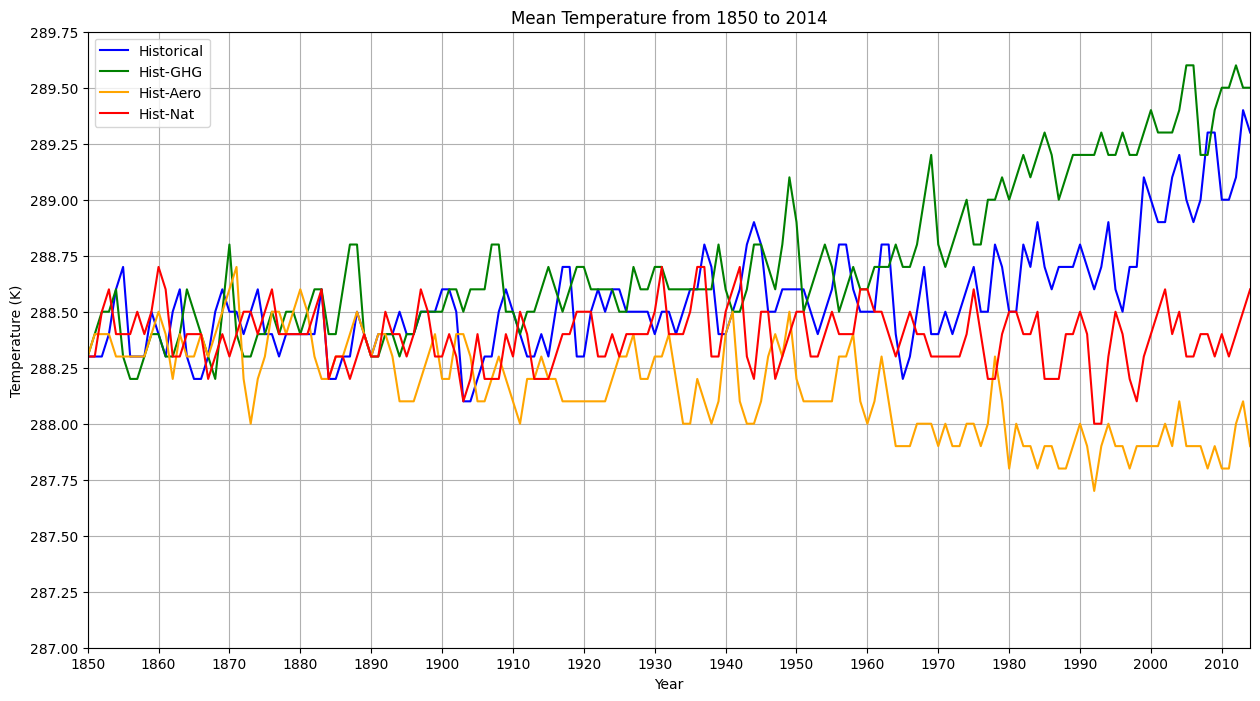

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
years = np.array([
    1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
    1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
    1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879,
    1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
    1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
    1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
    1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
    1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
    1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
    1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
    1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
    1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
    1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
    1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
    1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
    2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014
])

historical = np.array([
    288.3, 288.3, 288.3, 288.4, 288.6, 288.7, 288.3, 288.3,
    288.3, 288.5, 288.4, 288.3, 288.5, 288.6, 288.3, 288.2,
    288.2, 288.3, 288.5, 288.6, 288.5, 288.5, 288.4, 288.5,
    288.6, 288.4, 288.4, 288.3, 288.4, 288.4, 288.4, 288.4,
    288.4, 288.6, 288.2, 288.2, 288.3, 288.3, 288.5, 288.4,
    288.3, 288.4, 288.4, 288.4, 288.5, 288.4, 288.4, 288.5,
    288.5, 288.5, 288.6, 288.6, 288.5, 288.1, 288.1, 288.2,
    288.3, 288.3, 288.5, 288.6, 288.5, 288.4, 288.3, 288.3,
    288.4, 288.3, 288.5, 288.7, 288.7, 288.3, 288.3, 288.5,
    288.6, 288.5, 288.6, 288.6, 288.5, 288.5, 288.5, 288.5,
    288.4, 288.5, 288.5, 288.4, 288.5, 288.6, 288.6, 288.8,
    288.7, 288.4, 288.4, 288.5, 288.6, 288.8, 288.9, 288.8,
    288.5, 288.5, 288.6, 288.6, 288.6, 288.6, 288.5, 288.4,
    288.5, 288.6, 288.8, 288.8, 288.6, 288.5, 288.5, 288.5,
    288.8, 288.8, 288.4, 288.2, 288.3, 288.5, 288.7, 288.4,
    288.4, 288.5, 288.4, 288.5, 288.6, 288.7, 288.5, 288.5,
    288.8, 288.7, 288.5, 288.5, 288.8, 288.7, 288.9, 288.7,
    288.6, 288.7, 288.7, 288.7, 288.8, 288.7, 288.6, 288.7,
    288.9, 288.6, 288.5, 288.7, 288.7, 289.1, 289.0, 288.9,
    288.9, 289.1, 289.2, 289.0, 288.9, 289.0, 289.3, 289.3,
    289.0, 289.0, 289.1, 289.4, 289.3
])

hist_ghg = np.array([
    288.3, 288.4, 288.5, 288.5, 288.6, 288.3, 288.2, 288.2,
    288.3, 288.4, 288.4, 288.3, 288.3, 288.4, 288.6, 288.5,
    288.4, 288.3, 288.2, 288.5, 288.8, 288.4, 288.3, 288.3,
    288.4, 288.4, 288.5, 288.4, 288.5, 288.5, 288.4, 288.5,
    288.6, 288.6, 288.4, 288.4, 288.6, 288.8, 288.8, 288.4,
    288.3, 288.3, 288.4, 288.4, 288.3, 288.4, 288.4, 288.5,
    288.5, 288.5, 288.5, 288.6, 288.6, 288.5, 288.6, 288.6,
    288.6, 288.8, 288.8, 288.5, 288.5, 288.4, 288.5, 288.5,
    288.6, 288.7, 288.6, 288.5, 288.6, 288.7, 288.7, 288.6,
    288.6, 288.6, 288.6, 288.5, 288.5, 288.7, 288.6, 288.6,
    288.7, 288.7, 288.6, 288.6, 288.6, 288.6, 288.6, 288.6,
    288.6, 288.8, 288.6, 288.5, 288.5, 288.6, 288.8, 288.8,
    288.7, 288.6, 288.8, 289.1, 288.9, 288.5, 288.6, 288.7,
    288.8, 288.7, 288.5, 288.6, 288.7, 288.6, 288.6, 288.7,
    288.7, 288.7, 288.8, 288.7, 288.7, 288.8, 289.0, 289.2,
    288.8, 288.7, 288.8, 288.9, 289.0, 288.8, 288.8, 289.0,
    289.0, 289.1, 289.0, 289.1, 289.2, 289.1, 289.2, 289.3,
    289.2, 289.0, 289.1, 289.2, 289.2, 289.2, 289.2, 289.3,
    289.2, 289.2, 289.3, 289.2, 289.2, 289.3, 289.4, 289.3,
    289.3, 289.3, 289.4, 289.6, 289.6, 289.2, 289.2, 289.4,
    289.5, 289.5, 289.6, 289.5, 289.5
])

hist_aero = np.array([
    288.3, 288.4, 288.4, 288.4, 288.3, 288.3, 288.3, 288.3,
    288.3, 288.4, 288.5, 288.4, 288.2, 288.4, 288.3, 288.3,
    288.4, 288.3, 288.4, 288.5, 288.6, 288.7, 288.2, 288.0,
    288.2, 288.3, 288.5, 288.5, 288.4, 288.5, 288.6, 288.5,
    288.3, 288.2, 288.2, 288.3, 288.3, 288.4, 288.5, 288.4,
    288.3, 288.4, 288.4, 288.3, 288.1, 288.1, 288.1, 288.2,
    288.3, 288.4, 288.2, 288.2, 288.4, 288.4, 288.3, 288.1,
    288.1, 288.2, 288.3, 288.2, 288.1, 288.0, 288.2, 288.2,
    288.3, 288.2, 288.2, 288.1, 288.1, 288.1, 288.1, 288.1,
    288.1, 288.1, 288.2, 288.3, 288.3, 288.4, 288.2, 288.2,
    288.3, 288.3, 288.4, 288.2, 288.0, 288.0, 288.2, 288.1,
    288.0, 288.1, 288.4, 288.5, 288.1, 288.0, 288.0, 288.1,
    288.3, 288.4, 288.3, 288.5, 288.2, 288.1, 288.1, 288.1,
    288.1, 288.1, 288.3, 288.3, 288.4, 288.1, 288.0, 288.1,
    288.3, 288.1, 287.9, 287.9, 287.9, 288.0, 288.0, 288.0,
    287.9, 288.0, 287.9, 287.9, 288.0, 288.0, 287.9, 288.0,
    288.3, 288.1, 287.8, 288.0, 287.9, 287.9, 287.8, 287.9,
    287.9, 287.8, 287.8, 287.9, 288.0, 287.9, 287.7, 287.9,
    288.0, 287.9, 287.9, 287.8, 287.9, 287.9, 287.9, 287.9,
    288.0, 287.9, 288.1, 287.9, 287.9, 287.9, 287.8, 287.9,
    287.8, 287.8, 288.0, 288.1, 287.9
])

hist_nat = np.array([
    288.3, 288.3, 288.5, 288.6, 288.4, 288.4, 288.4, 288.5,
    288.4, 288.5, 288.7, 288.6, 288.3, 288.3, 288.4, 288.4,
    288.4, 288.2, 288.3, 288.4, 288.3, 288.4, 288.5, 288.5,
    288.4, 288.5, 288.6, 288.4, 288.4, 288.4, 288.4, 288.4,
    288.5, 288.6, 288.2, 288.3, 288.3, 288.2, 288.3, 288.4,
    288.3, 288.3, 288.5, 288.4, 288.4, 288.3, 288.4, 288.6,
    288.5, 288.3, 288.3, 288.4, 288.3, 288.1, 288.2, 288.4,
    288.2, 288.2, 288.2, 288.4, 288.3, 288.5, 288.4, 288.2,
    288.2, 288.2, 288.3, 288.4, 288.4, 288.5, 288.5, 288.5,
    288.3, 288.3, 288.4, 288.3, 288.4, 288.4, 288.4, 288.4,
    288.5, 288.7, 288.4, 288.4, 288.4, 288.5, 288.7, 288.7,
    288.3, 288.3, 288.5, 288.6, 288.7, 288.3, 288.2, 288.5,
    288.5, 288.2, 288.3, 288.4, 288.5, 288.5, 288.3, 288.3,
    288.4, 288.5, 288.4, 288.4, 288.4, 288.6, 288.6, 288.5,
    288.5, 288.4, 288.3, 288.4, 288.5, 288.4, 288.4, 288.3,
    288.3, 288.3, 288.3, 288.3, 288.4, 288.6, 288.4, 288.2,
    288.2, 288.4, 288.5, 288.5, 288.4, 288.4, 288.5, 288.2,
    288.2, 288.2, 288.4, 288.4, 288.5, 288.4, 288.0, 288.0,
    288.3, 288.5, 288.4, 288.2, 288.1, 288.3, 288.4, 288.5,
    288.6, 288.4, 288.5, 288.3, 288.3, 288.4, 288.4, 288.3,
    288.4, 288.3, 288.4, 288.5, 288.6
])

# Plotting
plt.figure(figsize=(15, 8))

plt.plot(years, historical, label='Historical', color='blue')
plt.plot(years, hist_ghg, label='Hist-GHG', color='green')
plt.plot(years, hist_aero, label='Hist-Aero', color='orange')
plt.plot(years, hist_nat, label='Hist-Nat', color='red')

plt.title('Mean Temperature from 1850 to 2014')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.xlim([1850, 2014])
plt.ylim([288.0, 289.5])
plt.xticks(np.arange(1850, 2015, 10))
plt.yticks(np.arange(287.0, 290, 0.25))

plt.show()



## Mimicking CO2 effect in EBM

Year 1900: CO2 = 288 ppm, Mean Temperature = 289.00 K
Year 1901: CO2 = 289 ppm, Mean Temperature = 289.01 K
Year 1902: CO2 = 290 ppm, Mean Temperature = 289.02 K
Year 1903: CO2 = 291 ppm, Mean Temperature = 289.03 K
Year 1904: CO2 = 292 ppm, Mean Temperature = 289.04 K
Year 1905: CO2 = 293 ppm, Mean Temperature = 289.05 K
Year 1906: CO2 = 294 ppm, Mean Temperature = 289.06 K
Year 1907: CO2 = 295 ppm, Mean Temperature = 289.07 K
Year 1908: CO2 = 296 ppm, Mean Temperature = 289.08 K
Year 1909: CO2 = 297 ppm, Mean Temperature = 289.09 K
Year 1910: CO2 = 298 ppm, Mean Temperature = 289.10 K
Year 1911: CO2 = 299 ppm, Mean Temperature = 289.11 K
Year 1912: CO2 = 300 ppm, Mean Temperature = 289.12 K
Year 1913: CO2 = 301 ppm, Mean Temperature = 289.13 K
Year 1914: CO2 = 302 ppm, Mean Temperature = 289.14 K
Year 1915: CO2 = 303 ppm, Mean Temperature = 289.15 K
Year 1916: CO2 = 304 ppm, Mean Temperature = 289.16 K
Year 1917: CO2 = 305 ppm, Mean Temperature = 289.17 K
Year 1918: CO2 = 306 ppm, Me

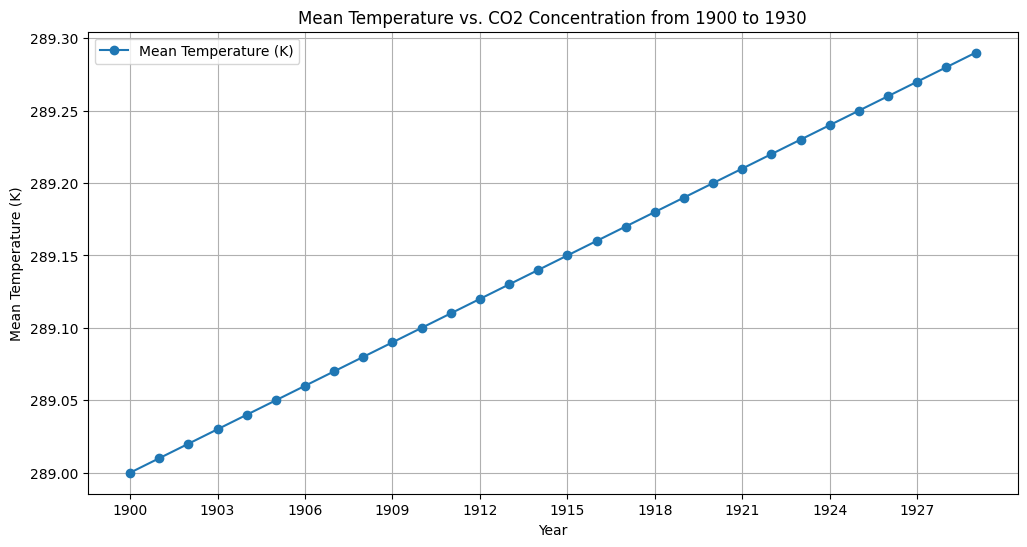

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = 1361  # Solar constant, in W/m^2
A = 0.3   # Earth's average albedo (fraction of sunlight reflected)
sigma = 5.67e-8  # Stefan-Boltzmann constant, in W/m^2/K^4

# Initial parameters
initial_CO2 = 288  # Initial CO2 concentration in ppm
years = 30      	# Number of years to simulate
start_year = 1900   # Starting year
end_year = start_year + years - 1  # Ending year
CO2_increase_per_year = 1  # Annual increase in CO2 concentration in ppm

# Create an array to store CO2 values for 30 years
CO2_values = np.array([initial_CO2 + CO2_increase_per_year * i for i in range(years)])

# Climate sensitivity parameter (°C per 100 ppm increase)
climate_sensitivity = 1.0  # °C increase per 100 ppm increase in CO2

# List to store calculated mean temperatures
mean_temperatures = []

# Starting temperature with greenhouse effect considered
initial_temperature = 289.0  # Initial temperature in K
mean_temperatures.append(initial_temperature)

# Calculate mean temperature for each CO2 concentration
for year in range(1, years):
	# Calculate the CO2 difference from the initial value
	delta_CO2 = CO2_values[year] - initial_CO2

	# Calculate temperature increase based on the change in CO2 concentration
	temperature_increase = (delta_CO2 / 100) * climate_sensitivity

	# New temperature considering the greenhouse effect
	new_temperature = initial_temperature + temperature_increase
	mean_temperatures.append(new_temperature)

# Convert mean temperatures to numpy array for analysis
mean_temperatures = np.array(mean_temperatures)

# Output results
for year in range(years):
	print(f"Year {start_year + year}: CO2 = {CO2_values[year]} ppm, Mean Temperature = {mean_temperatures[year]:.2f} K")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(start_year, end_year + 1), mean_temperatures, marker='o', label='Mean Temperature (K)')
plt.title('Mean Temperature vs. CO2 Concentration from 1900 to 1930')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (K)')
plt.xticks(range(start_year, end_year + 1))
plt.xticks(np.arange(1900, 1930, 3))
plt.grid()
plt.legend()
plt.show()


## Ferret and Cast

Ferret in a climatology tool. Runns in Linux and Mac OS. Used WSLfor Windows 11 to run tool. After installation best to run the software in python with ferretmagic module. Commands are same as ferret.
Google cast uses ML to make short term- 10 days predictions. Combination on mathematical computation and statistical predictions is USP. 0.25 degree resilution
My obsn:

*   Good for large scale country level studies. Not sure for higher resolution.
*   Standard laptop adequate once you drill down to small area.
*   Use in combination with QGIS for GIS integration abd better cartography tools




